<a href="https://colab.research.google.com/github/143biswajit/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
imdb_data = pd.read_csv('/content/drive/MyDrive/ALMABETTER  / NETFLIX MOVIES AND TV SHOWS CLUSTERING -Biswajit Gochhayat/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [5]:
imdb_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
data = imdb_data.copy()

In [9]:
# printing the shape of data shape
print('the no of row present in the data frame =    ',data.shape[0])
print("*"*60)
print('the no of column present in the data frame = ',data.shape[1])
print("*"*60)
print('the no of data present in the data frame =   ',data.size)
print("*"*60)
#Display column names
print(f'Our dataset has following columns -\n {list(data.columns)}')

the no of row present in the data frame =     7787
************************************************************
the no of column present in the data frame =  12
************************************************************
the no of data present in the data frame =    93444
************************************************************
Our dataset has following columns -
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [17]:
# #How many uinque items are present in our data set in each columns:
for i in data:
  a = data[i].nunique()   
  if a < 1:
    print(i, 'has' , a ,'unique value')
    print("*"*50)
  else :
    print(i, 'has' ,a, 'unique values and those are\n',data[i].value_counts())
    print("*"*50)

show_id has 7787 unique values and those are
 s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64
**************************************************
type has 2 unique values and those are
 Movie      5377
TV Show    2410
Name: type, dtype: int64
**************************************************
title has 7787 unique values and those are
 3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64
**

In [18]:
# transposing the description of our all data for better understanding
data.describe(include='object').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [20]:
for i in data :
  if data[i].isna().sum()!=0:
    print(i,"is having ",data[i].isna().sum(),"null values","which is",round(100*(data[i].isnull().sum()/len(data)), 2),"%")

director is having  2389 null values which is 30.68 %
cast is having  718 null values which is 9.22 %
country is having  507 null values which is 6.51 %
date_added is having  10 null values which is 0.13 %
rating is having  7 null values which is 0.09 %


In [21]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [22]:
data['rating'].fillna(data['rating'].mode()[0],inplace = True)
data['country'].fillna(data['country'].mode()[0],inplace = True)
data['cast'].replace(np.nan, 'missing info',inplace  = True)
data['director'].fillna(data['director'].mode()[0],inplace = True)
data['date_added'].fillna(data['date_added'].mode()[0],inplace = True)

In [43]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day
data['year_added'].astype(int);
data['day_added'].astype(int);

In [44]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [27]:
data['type'].value_counts().to_frame()

,type
Movie,5377
TV Show,2410


In [28]:
netflix_movies = data[data["type"]=="Movie"]
netflix_shows = data[data["type"]=="TV Show"]

In [29]:
import plotly.express as px

In [30]:
content = data['type'].value_counts().reset_index()
content = content[content['type'] /  content['type'].sum() > 0.01]

fig = px.pie(content, values='type', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

In [31]:
m_s_groups = data.groupby(["title", "type", "country",]).apply(lambda df: df.date_added).to_frame() #Returns Pandas Series with movie / series title and original index
m_s_groups.head(10)

,,,,date_added
title,type,country,,
#Alive,Movie,South Korea,27,"September 8, 2020"
#AnneFrank - Parallel Stories,Movie,Italy,28,"July 1, 2020"
#FriendButMarried,Movie,Indonesia,31,"May 21, 2020"
#FriendButMarried 2,Movie,Indonesia,32,"June 28, 2020"
#Roxy,Movie,Canada,34,"April 10, 2019"
#Rucker50,Movie,United States,35,"December 1, 2016"
#Selfie,Movie,Romania,36,"June 1, 2019"
#Selfie 69,Movie,Romania,37,"June 1, 2019"
#blackAF,TV Show,United States,29,"April 17, 2020"


In [32]:
data['country'].value_counts().head(10).to_frame().T

,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey
country,3062,923,397,226,183,177,134,115,101,100


In [33]:
from wordcloud import WordCloud

In [35]:
country = data['country'].value_counts().reset_index()
country

,index,country
0,United States,3062
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


In [34]:
# import plotly.express as px
country = data['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

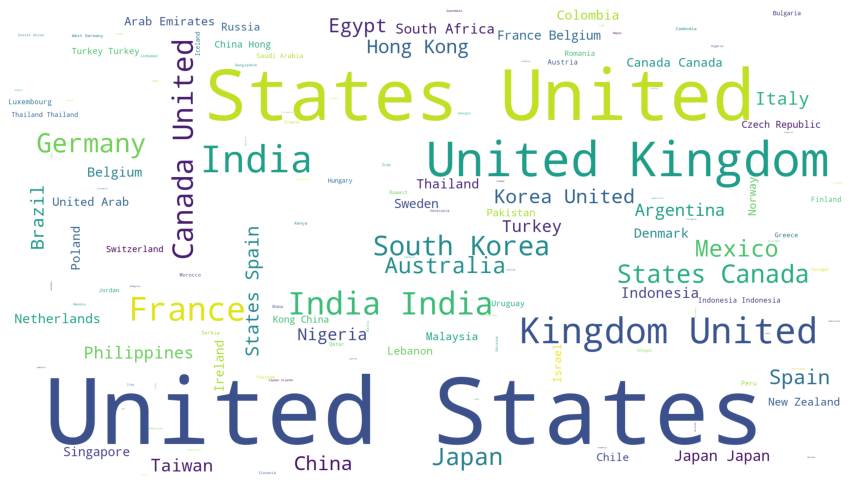

In [37]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [45]:
data['year_added'].value_counts().head(10).to_frame().T

,2019,2020,2018,2017,2016,2021,2015,2014,2011,2013
year_added,2153,2019,1685,1225,443,117,88,25,13,11


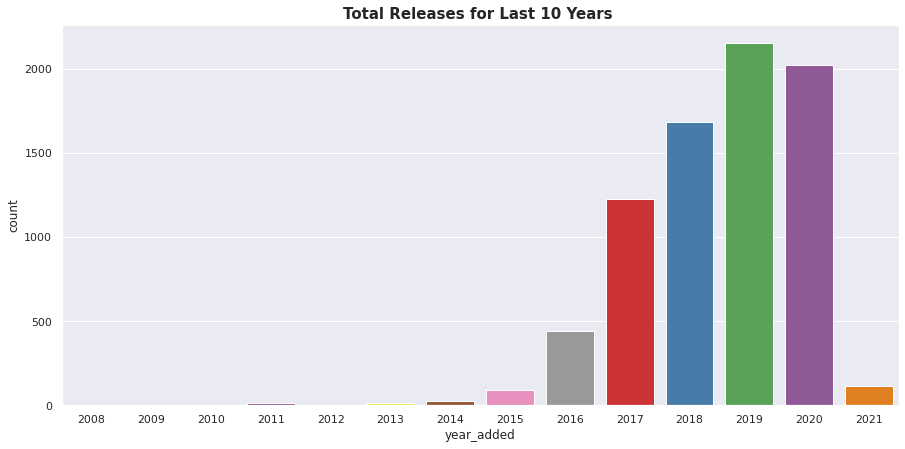

In [46]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=data,palette="Set1")
plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

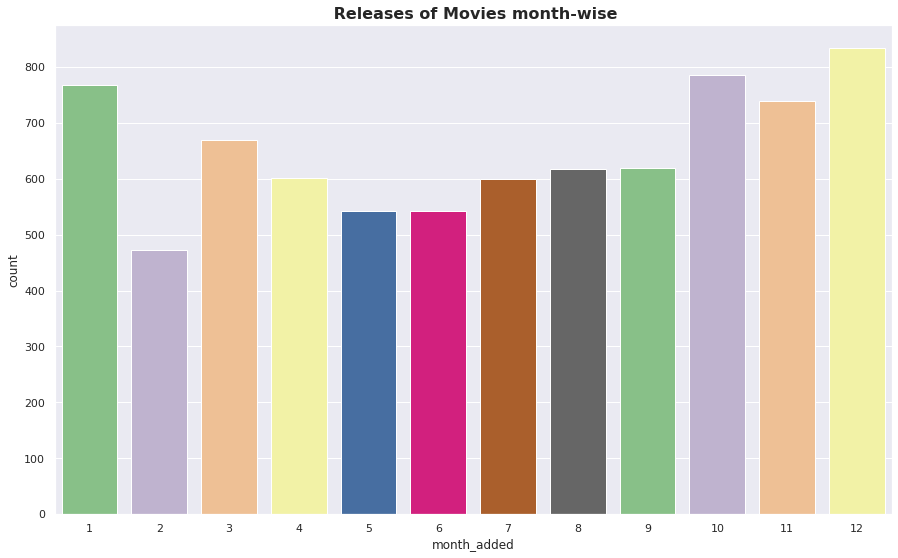

In [47]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=data,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

In [48]:
booking_per_year = data.groupby('type')['rating'].value_counts().sort_index().unstack()
booking_per_year

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,39.0,3.0,79.0,247.0,386.0,663.0,1272.0,111.0,1850.0,505.0,117.0,95.0,5.0,5.0
TV Show,NaN,NaN,5.0,NaN,NaN,2.0,659.0,83.0,1020.0,301.0,163.0,176.0,1.0,NaN


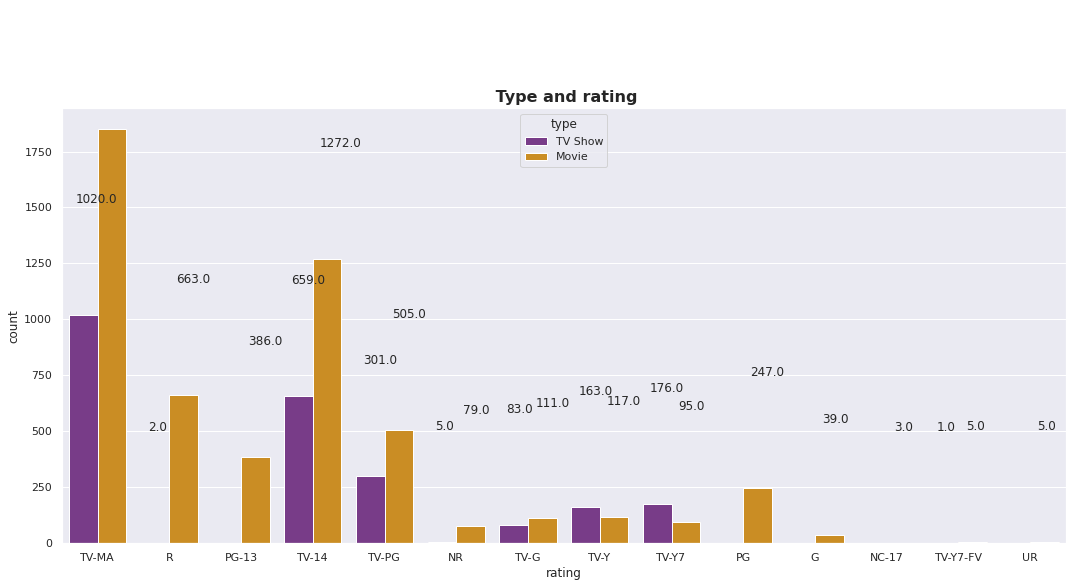

In [49]:
# type wise rating count
plt.figure(figsize=(18,8))
ax = sns.countplot(x='rating',hue='type',data=data,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

In [50]:
data['rating'].value_counts().head(10).to_frame().T

,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y,TV-Y7,PG,TV-G,NR
rating,2870,1931,806,665,386,280,271,247,194,84


In [51]:
df_rating = pd.DataFrame(data['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})
fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',
color_discrete_sequence=['#b20710'], text='count')
fig_bar.update_xaxes(showgrid=False)
fig_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),
hovermode="y unified",
xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),
legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

In [52]:
# import plotly.express as px
rating = data['rating'].value_counts().reset_index()
rating = rating[rating['rating'] /  rating['rating'].sum() > 0.01]

fig = px.pie(rating, values='rating', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

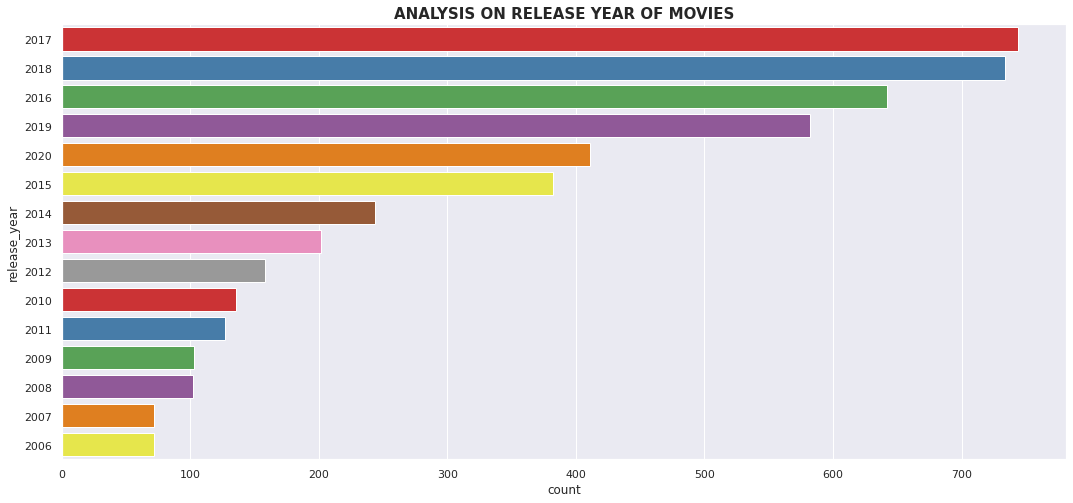

In [53]:
#Year wise analysis
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

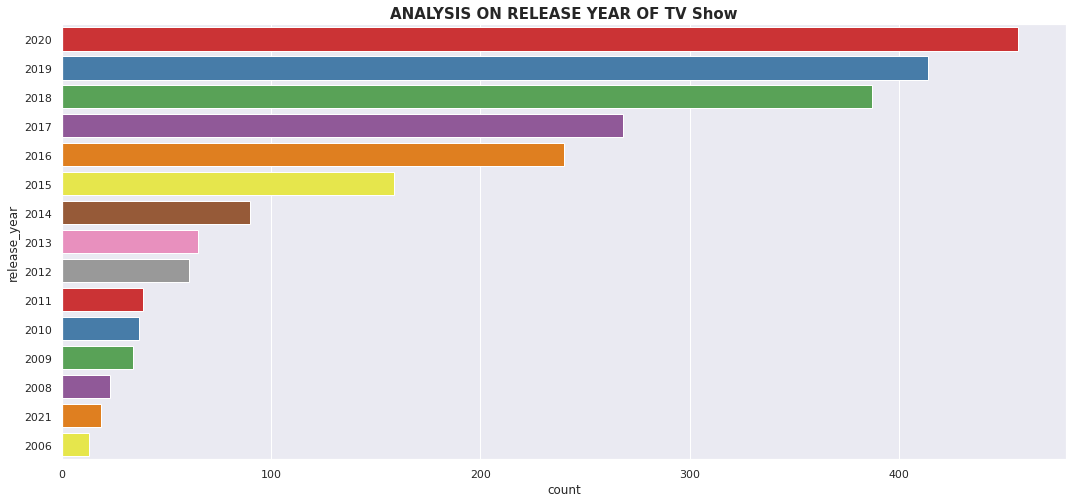

In [54]:
#ANALYSIS ON RELEASE YEAR OF TV Show
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set1", order=netflix_shows['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

In [55]:
from datetime import datetime as dt

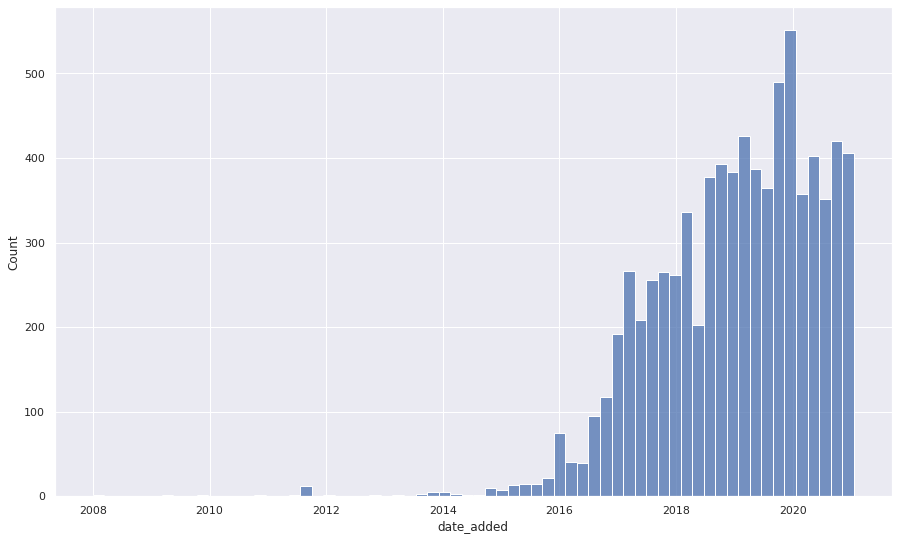

In [56]:
data['date_added'] = pd.to_datetime(data['date_added'])
sns.histplot(data['date_added'])

In [57]:
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'])
netflix_shows['date_added'] = pd.to_datetime(netflix_shows['date_added'])

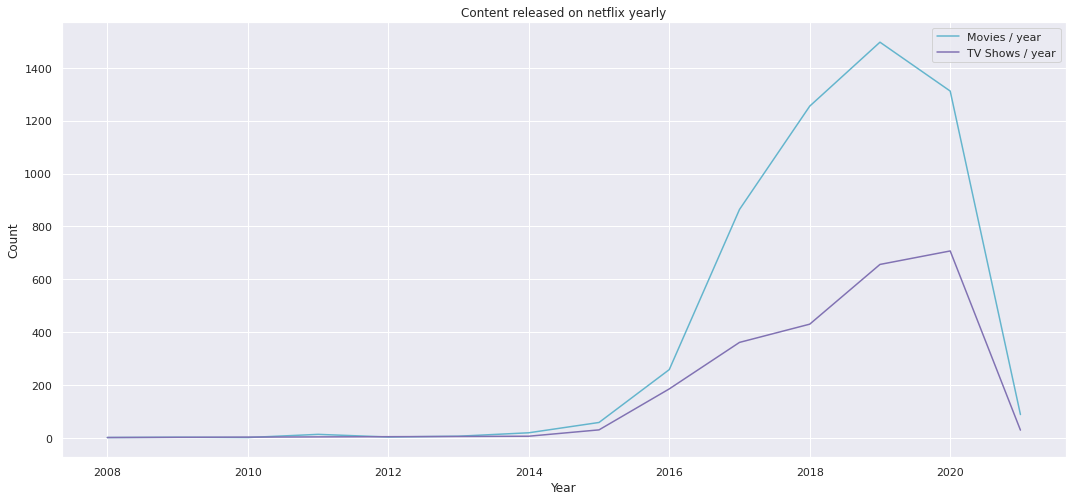

In [58]:
#getting the count of movies and tv shows based in year_added
movies_counts = netflix_movies['date_added'].dt.year.value_counts()
tv_counts = netflix_shows['date_added'].dt.year.value_counts()

#line graph for movies and tv shows count
plt.figure(figsize=(18,8))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content released on netflix yearly')
sns.lineplot(data=movies_counts, color="c",label="Movies / year")
sns.lineplot(data=tv_counts, color="m", label="TV Shows / year")

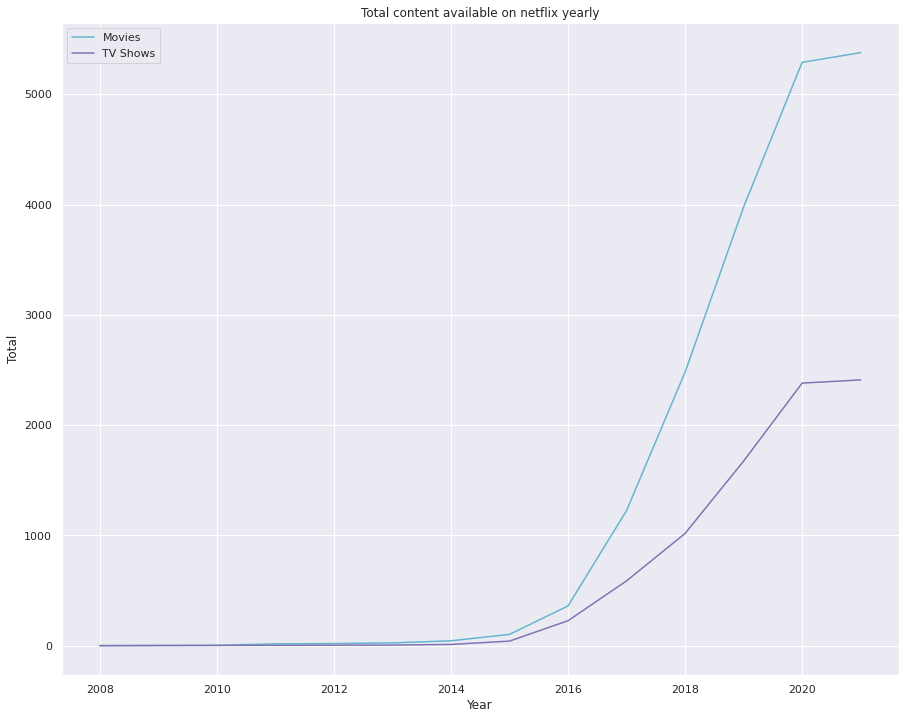

In [59]:
# Plotting count of movies/tv shows available on netflix with time
tv_show_c = pd.DataFrame()
tv_show_c['year'] = netflix_shows['date_added'].dt.year.value_counts().index
tv_show_c['added_c'] = netflix_shows['date_added'].dt.year.value_counts().values
tv_show_c['total_c'] = tv_show_c['added_c']
for index,yr in tv_show_c['year'].iteritems():
  tv_show_c.loc[index,'total_c'] = tv_show_c[tv_show_c['year']<=yr]['added_c'].sum()
tv_show_c.set_index('year',inplace=True)

movie_c = pd.DataFrame()
movie_c['year'] = netflix_movies['date_added'].dt.year.value_counts().index
movie_c['added_c'] = netflix_movies['date_added'].dt.year.value_counts().values
movie_c['total_c'] = movie_c['added_c']
for index,yr in movie_c['year'].iteritems():
  movie_c.loc[index,'total_c'] = movie_c[movie_c['year']<=yr]['added_c'].sum()
movie_c.set_index('year',inplace=True)

plt.figure(figsize=(15,12))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total content available on netflix yearly')
sns.lineplot(data=movie_c['total_c'], color="c",label="Movies")
sns.lineplot(data=tv_show_c['total_c'], color="m", label="TV Shows")

In [60]:
data['listed_in'].value_counts(ascending=False).head(10).to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies"
listed_in,334,321,320,243,215,205,177,172,169,161


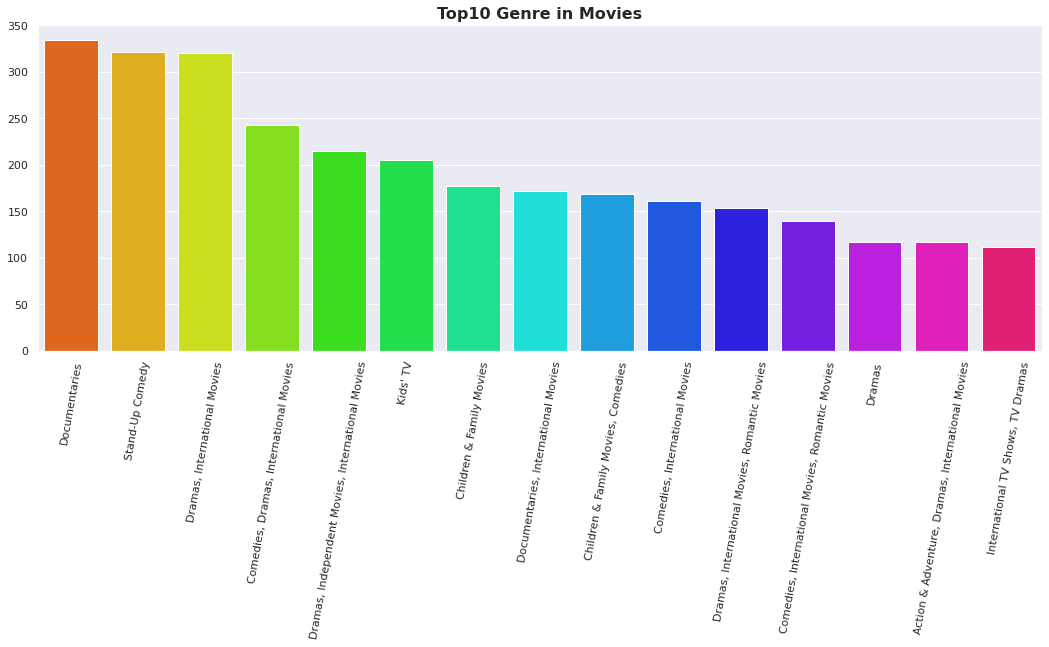

In [61]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = data["listed_in"].value_counts().head(15).index,
            y = data["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

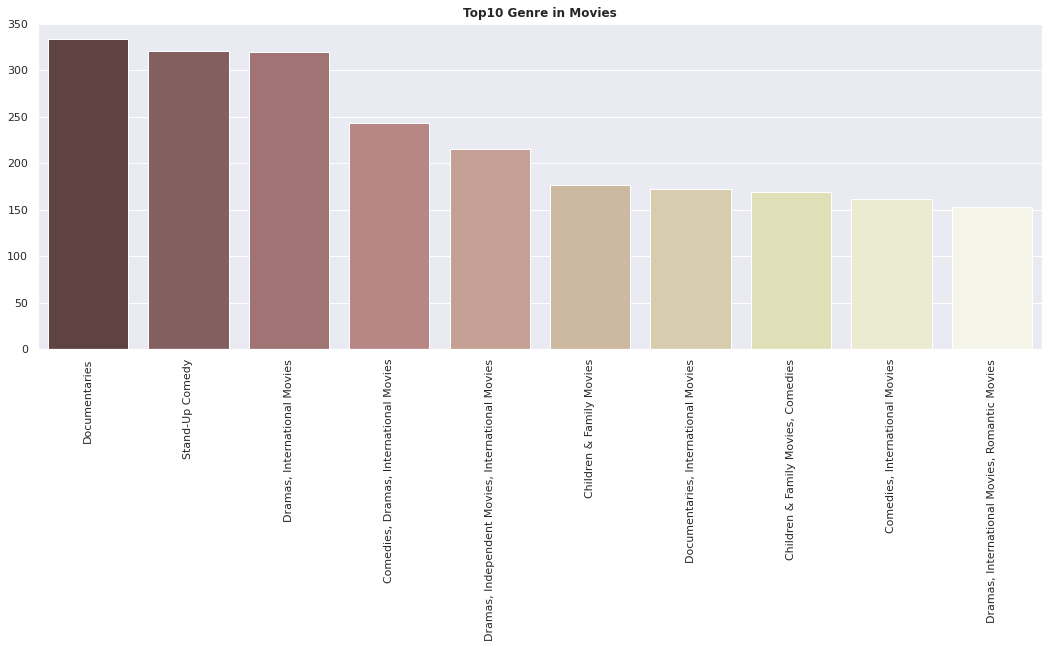

In [62]:
#Top10 Genre in Movies
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,
            y = netflix_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

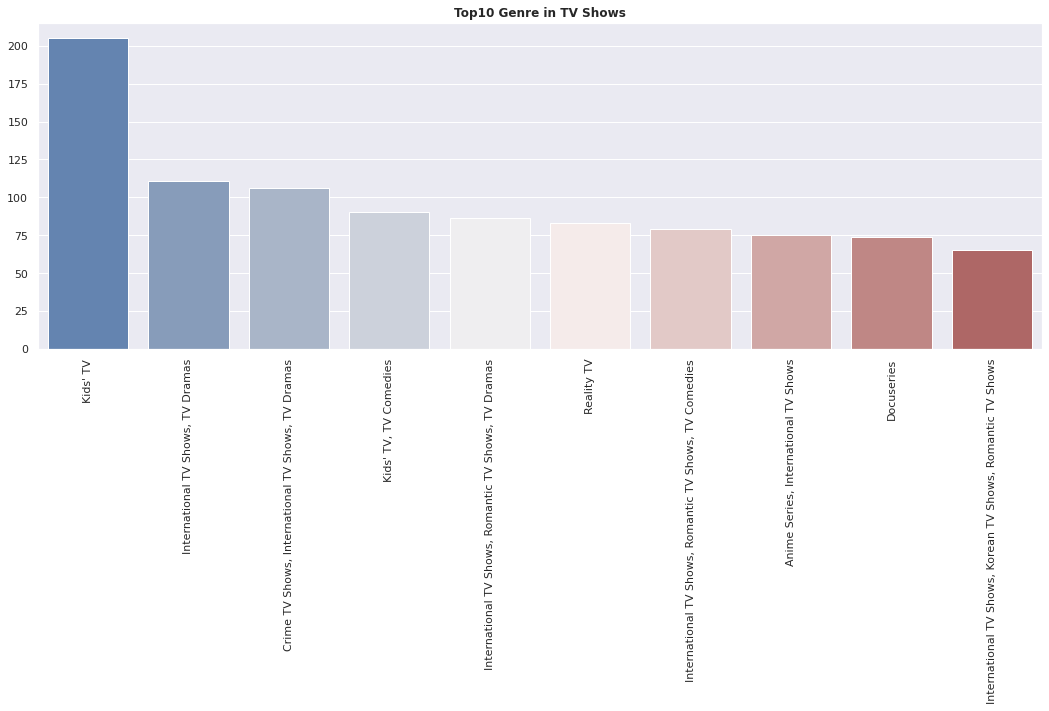

In [63]:
#Top10 Genre in TV Shows
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

In [64]:
data['duration']=data['duration'].str.replace('Season','')
data['duration']=data['duration'].str.replace('s','')
data['duration']=data['duration'].str.replace('min','')

data['duration']=data['duration'].astype(str).astype(int)

In [65]:
#Duration
netflix_shows['duration']=netflix_shows['duration'].str.replace('Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_movies['duration']=netflix_movies["duration"].str.replace('min','')

netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)

In [66]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20


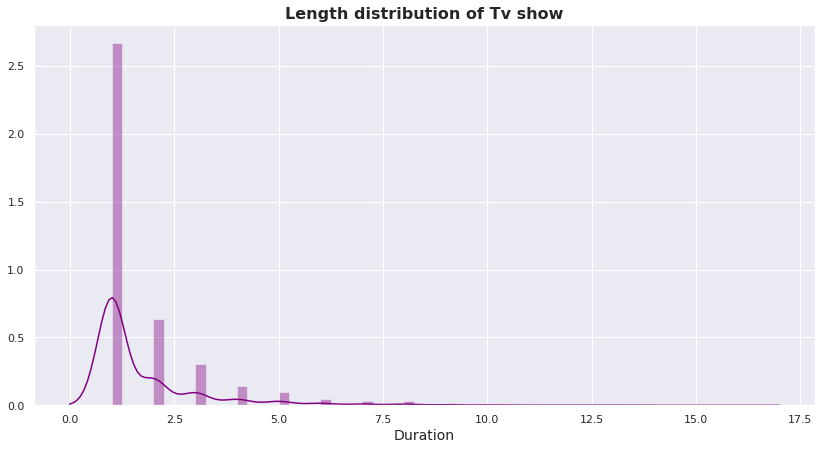

In [67]:
plt.figure(figsize=(14, 7))

sns.distplot(netflix_shows['duration'], bins=60,color='purple').set(ylabel=None)

plt.title('Length distribution of Tv show', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

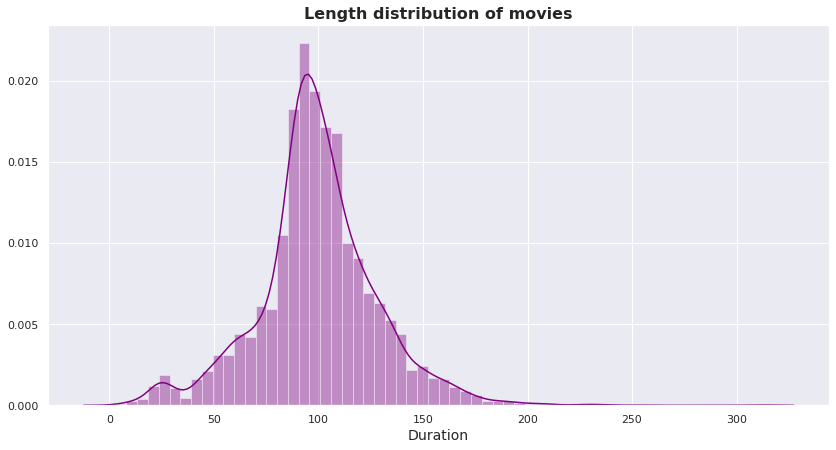

In [68]:
plt.figure(figsize=(14, 7))

sns.distplot(netflix_movies['duration'], bins=60,color='purple').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

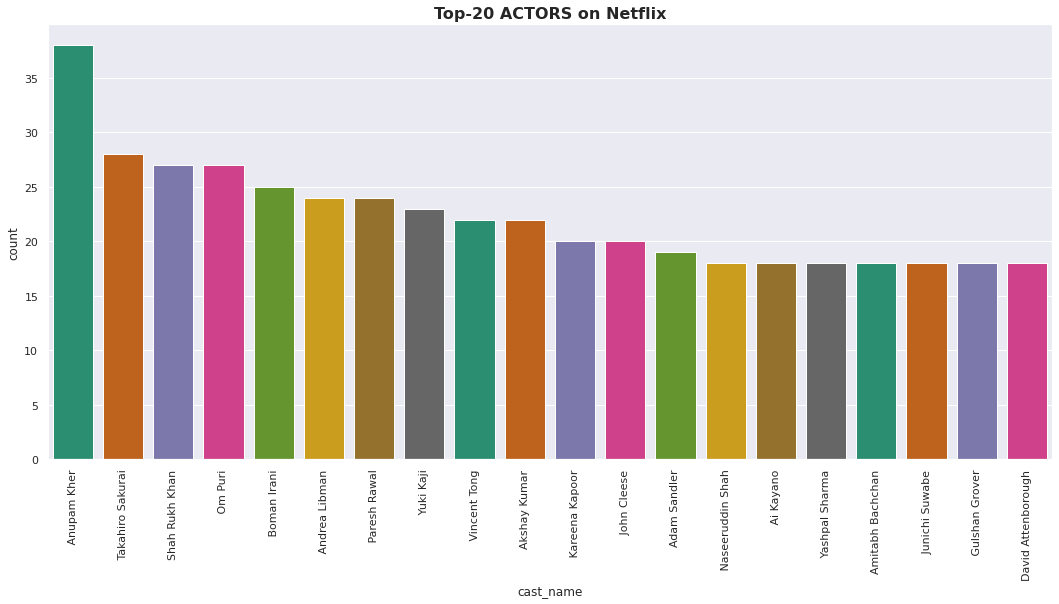

In [69]:
# Top 20 actors netflix
data['cast_name'] = data['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in data['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(18,8))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

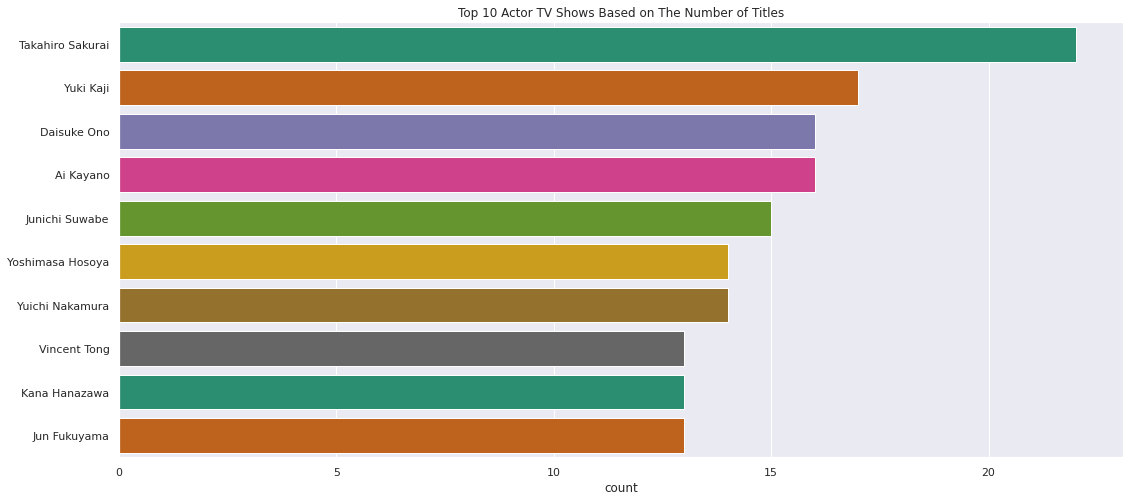

In [70]:
#Top 10 Actor TV Shows Based on The Number of Titles
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(18,8))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette="Dark2")
plt.show()

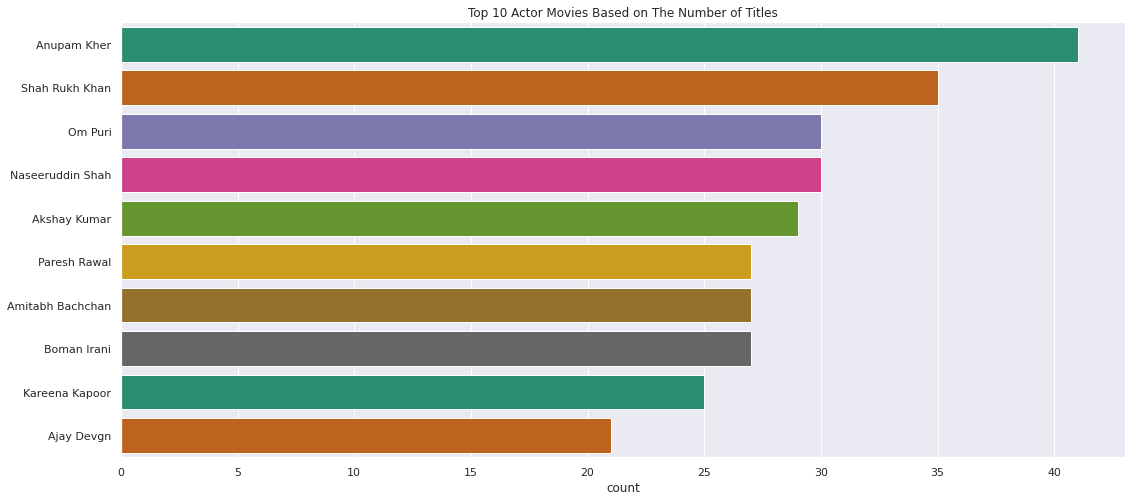

In [71]:
#top 10 Actor Movies Based on The Number of Titles
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(18,8))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette="Dark2")
plt.show()

In [72]:
netflix_shows['duration'].value_counts()

1     1608
2      382
3      184
4       87
5       58
6       30
7       19
8       18
9        8
10       6
11       3
13       2
12       2
15       2
16       1
Name: duration, dtype: int64

In [73]:
# Season-wise distribution of tv shows
shows=netflix_shows['duration'].value_counts().reset_index()
shows.head()

,index,duration
0,1,1608
1,2,382
2,3,184
3,4,87
4,5,58


In [74]:
# Season-wise distribution of tv shows
shows=netflix_shows['duration'].value_counts().T.reset_index()
fig = px.pie(shows,values='duration',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

In [75]:
movies=netflix_movies['duration'].value_counts().reset_index()
movies.head()

,index,duration
0,90,136
1,93,131
2,91,125
3,94,125
4,95,119


In [76]:
# Season-wise distribution of tv shows
movies=netflix_movies['duration'].value_counts().reset_index()


fig = px.pie(movies,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of movies")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

In [77]:
#LONGEST TV - SHOWS
long_shows = netflix_shows[netflix_shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
tf=long_shows_data.sort_values(by=['duration'],ascending=False)
tf

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
5137,Red vs. Blue,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2263,Frasier,11
2678,Heartland,11


In [78]:
fig = px.pie(tf,values='duration',names='title',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color = 'RebeccaPurple', width=2)))

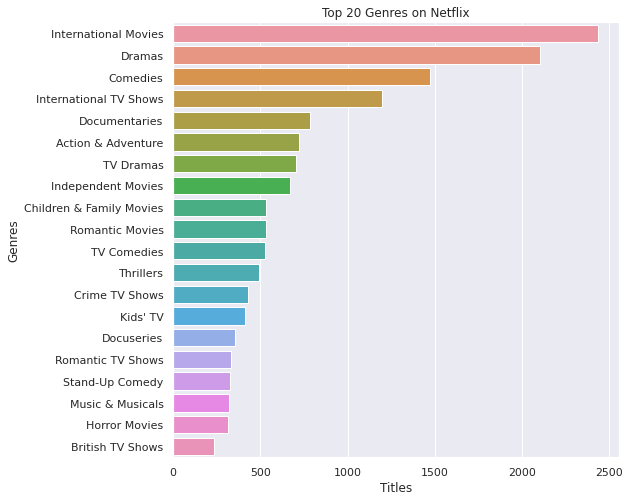

In [79]:
#Top 20 Genres on DATA
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

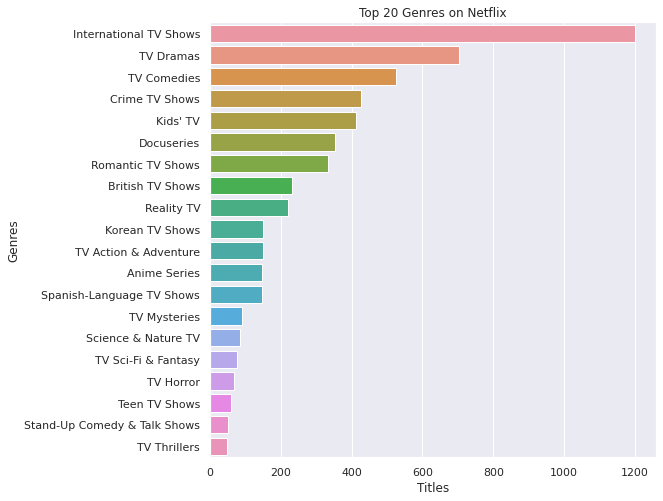

In [80]:
#Top 20 Genres on Netflix_SHOW
filtered_genres = netflix_shows.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [81]:
top_dir = data['director'].value_counts().reset_index()
top_dir = top_dir[top_dir['director'] >=8]
top_dir.head()

,index,director
0,"Raúl Campos, Jan Suter",2407
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12


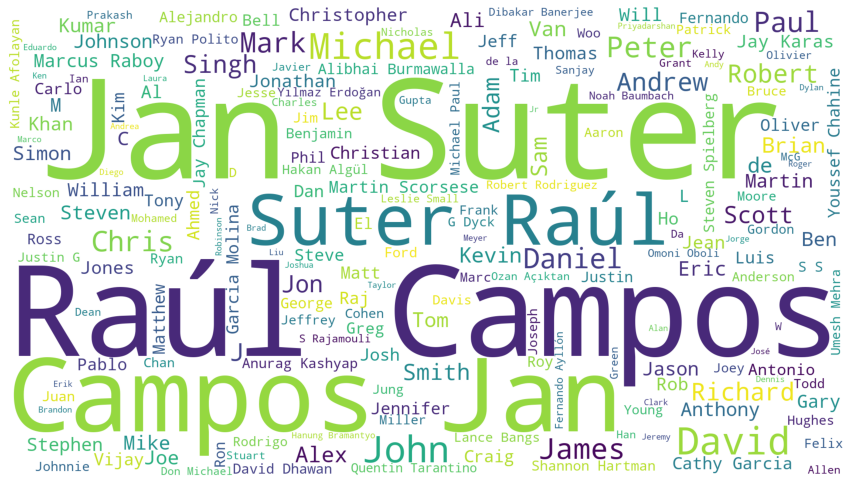

In [82]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()